In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
raw_df = pd.read_csv("train_data.csv")

raw_df.head(125)

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction
0,1003450,M,26-01-2021 02:21,26-01-2021 02:21,26-01-2021 02:32,26-01-2021 02:49,11696,15.666000,39.75,46.0,46.0,5.0,Normal,low,621.0,0.0,0
1,1003451,F,26-01-2021 02:33,26-01-2021 02:33,26-01-2021 02:50,26-01-2021 03:11,18117,25.207000,41.40,8.0,8.0,4.0,Prime,other,105.0,0.0,0
2,1003452,M,26-01-2021 02:39,26-01-2021 02:39,26-01-2021 02:56,26-01-2021 03:12,18623,22.074000,72.00,1.0,1.0,2.0,Normal,other,66.0,0.0,0
3,1003453,M,26-01-2021 02:47,26-01-2021 02:48,26-01-2021 03:21,26-01-2021 03:41,15945,21.894000,95.70,1.0,1.0,5.0,Prime,low,127.0,0.0,0
4,1003454,F,26-01-2021 03:06,26-01-2021 03:07,26-01-2021 03:31,26-01-2021 04:00,17589,27.870000,60.15,34.0,34.0,0.0,Normal,low,84.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1003570,F,26-01-2021 03:59,26-01-2021 03:59,26-01-2021 04:07,26-01-2021 04:40,17947,21.732000,41.25,53.0,52.0,1.0,Prime,low,801.0,1.0,0
121,1003571,M,26-01-2021 03:59,26-01-2021 03:59,26-01-2021 04:10,26-01-2021 04:25,21044,0.605424,50.85,126.0,125.0,1.0,Prime,low,935.0,1.0,0
122,1003572,M,26-01-2021 03:59,26-01-2021 04:00,26-01-2021 04:12,26-01-2021 04:40,156,4.348000,30.00,36.0,35.0,5.0,Prime,high,289.0,1.0,0
123,1003573,F,26-01-2021 03:59,26-01-2021 04:00,26-01-2021 04:17,26-01-2021 04:28,963,22.133000,54.15,64.0,62.0,4.0,Normal,other,1240.0,2.0,0


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339600 entries, 0 to 339599
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              339600 non-null  int64  
 1   gender                339600 non-null  object 
 2   order_time            339600 non-null  object 
 3   allot_time            339600 non-null  object 
 4   pickup_time           337716 non-null  object 
 5   delivered_time        335596 non-null  object 
 6   transport_id          339600 non-null  int64  
 7   first_mile_distance   339600 non-null  float64
 8   last_mile_distance    339600 non-null  float64
 9   alloted_orders        326624 non-null  float64
 10  delivered_orders      326319 non-null  float64
 11  customer_care_calls   339572 non-null  float64
 12  membership            339600 non-null  object 
 13  product_importan      339600 non-null  object 
 14  lifetime_order_count  339560 non-null  float64
 15  

In [5]:
raw_df.isnull().sum()/3396

order_id                0.000000
gender                  0.000000
order_time              0.000000
allot_time              0.000000
pickup_time             0.554770
delivered_time          1.179034
transport_id            0.000000
first_mile_distance     0.000000
last_mile_distance      0.000000
alloted_orders          3.820966
delivered_orders        3.910777
customer_care_calls     0.008245
membership              0.000000
product_importan        0.000000
lifetime_order_count    0.011779
undelivered_orders      3.910777
dissatisfaction         0.000000
dtype: float64

In [6]:
raw_df["transport_id"].nunique()

17887

In [7]:
df = raw_df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322950 entries, 0 to 339599
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              322950 non-null  int64  
 1   gender                322950 non-null  object 
 2   order_time            322950 non-null  object 
 3   allot_time            322950 non-null  object 
 4   pickup_time           322950 non-null  object 
 5   delivered_time        322950 non-null  object 
 6   transport_id          322950 non-null  int64  
 7   first_mile_distance   322950 non-null  float64
 8   last_mile_distance    322950 non-null  float64
 9   alloted_orders        322950 non-null  float64
 10  delivered_orders      322950 non-null  float64
 11  customer_care_calls   322950 non-null  float64
 12  membership            322950 non-null  object 
 13  product_importan      322950 non-null  object 
 14  lifetime_order_count  322950 non-null  float64
 15  

In [8]:
322950/3396

95.09717314487632

In [9]:
df["gender"].value_counts()

F    161679
M    161271
Name: gender, dtype: int64

In [10]:
df.head()

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction
0,1003450,M,26-01-2021 02:21,26-01-2021 02:21,26-01-2021 02:32,26-01-2021 02:49,11696,15.666,39.75,46.0,46.0,5.0,Normal,low,621.0,0.0,0
1,1003451,F,26-01-2021 02:33,26-01-2021 02:33,26-01-2021 02:50,26-01-2021 03:11,18117,25.207,41.40,8.0,8.0,4.0,Prime,other,105.0,0.0,0
2,1003452,M,26-01-2021 02:39,26-01-2021 02:39,26-01-2021 02:56,26-01-2021 03:12,18623,22.074,72.00,1.0,1.0,2.0,Normal,other,66.0,0.0,0
3,1003453,M,26-01-2021 02:47,26-01-2021 02:48,26-01-2021 03:21,26-01-2021 03:41,15945,21.894,95.70,1.0,1.0,5.0,Prime,low,127.0,0.0,0
4,1003454,F,26-01-2021 03:06,26-01-2021 03:07,26-01-2021 03:31,26-01-2021 04:00,17589,27.870,60.15,34.0,34.0,0.0,Normal,low,84.0,0.0,0


In [11]:
df['order_hr'] = df['order_time'].apply(lambda x : x.split()[1])
df['allot_hr'] = df['allot_time'].apply(lambda x : x.split()[1])
df['pickup_hr'] = df['pickup_time'].apply(lambda x : x.split()[1])
df['delivered_hr'] = df['delivered_time'].apply(lambda x : x.split()[1])

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/605099830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_hr'] = df['order_time'].apply(lambda x : x.split()[1])
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/605099830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['allot_hr'] = df['allot_time'].apply(lambda x : x.split()[1])
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/605099830.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [12]:
df[['order_hr','allot_hr','pickup_hr','delivered_hr']]

,order_hr,allot_hr,pickup_hr,delivered_hr
0,02:21,02:21,02:32,02:49
1,02:33,02:33,02:50,03:11
2,02:39,02:39,02:56,03:12
3,02:47,02:48,03:21,03:41
4,03:06,03:07,03:31,04:00
...,...,...,...,...
339595,15:15,15:16,15:37,15:46
339596,15:15,15:15,15:30,15:39
339597,15:15,15:15,15:36,16:00
339598,15:15,15:15,15:38,16:03


In [13]:
df['order_date'] = df['order_time'].apply(lambda x : x.split()[0])
df['allot_date'] = df['allot_time'].apply(lambda x : x.split()[0])
df['pickup_date'] = df['pickup_time'].apply(lambda x : x.split()[0])
df['delivered_date'] = df['delivered_time'].apply(lambda x : x.split()[0])

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/1376262407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date'] = df['order_time'].apply(lambda x : x.split()[0])
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/1376262407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['allot_date'] = df['allot_time'].apply(lambda x : x.split()[0])
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/1376262407.py:3: SettingWithCopyWarning: 
A value is trying 

In [14]:
df[['order_date','delivered_date']]

,order_date,delivered_date
0,26-01-2021,26-01-2021
1,26-01-2021,26-01-2021
2,26-01-2021,26-01-2021
3,26-01-2021,26-01-2021
4,26-01-2021,26-01-2021
...,...,...
339595,03-02-2021,03-02-2021
339596,03-02-2021,03-02-2021
339597,03-02-2021,03-02-2021
339598,03-02-2021,03-02-2021


In [15]:
ord_date = df['order_date']
del_date = df['delivered_date']

In [16]:
same_day_deliveries=0

for i in range(ord_date.size):
    if ord_date.iloc[i] in del_date.iloc[i]:
        same_day_deliveries+=1
        
print(same_day_deliveries)

322772


In [17]:
322772/3229.5

99.94488310884037

In [18]:
df['same_day_delivery'] = df.apply(lambda x : 1 if x['order_date'] in x['delivered_date'] else 0, axis=1)
df['same_day_delivery']

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/439565299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['same_day_delivery'] = df.apply(lambda x : 1 if x['order_date'] in x['delivered_date'] else 0, axis=1)


0         1
1         1
2         1
3         1
4         1
         ..
339595    1
339596    1
339597    1
339598    1
339599    1
Name: same_day_delivery, Length: 322950, dtype: int64

In [19]:
df[df['same_day_delivery']==0]

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,...,dissatisfaction,order_hr,allot_hr,pickup_hr,delivered_hr,order_date,allot_date,pickup_date,delivered_date,same_day_delivery
20,1003470,M,26-01-2021 03:28,26-01-2021 04:09,27-01-2021 03:59,27-01-2021 04:15,12885,28.438000,102.15,29.0,...,1,03:28,04:09,03:59,04:15,26-01-2021,26-01-2021,27-01-2021,27-01-2021,0
8483,1011933,F,26-01-2021 08:43,26-01-2021 08:44,26-01-2021 08:56,27-01-2021 06:33,2318,5.416000,23.70,223.0,...,0,08:43,08:44,08:56,06:33,26-01-2021,26-01-2021,26-01-2021,27-01-2021,0
10563,1014013,F,26-01-2021 09:26,26-01-2021 09:26,26-01-2021 09:36,27-01-2021 05:44,21265,14.761000,32.40,2.0,...,0,09:26,09:26,09:36,05:44,26-01-2021,26-01-2021,26-01-2021,27-01-2021,0
10866,1014316,F,26-01-2021 09:37,26-01-2021 09:37,26-01-2021 09:47,27-01-2021 12:11,3400,15.915000,78.75,122.0,...,0,09:37,09:37,09:47,12:11,26-01-2021,26-01-2021,26-01-2021,27-01-2021,0
11699,1015149,M,26-01-2021 10:35,26-01-2021 10:36,26-01-2021 10:48,27-01-2021 03:54,21303,6.530000,12.45,40.0,...,0,10:35,10:36,10:48,03:54,26-01-2021,26-01-2021,26-01-2021,27-01-2021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312475,1315925,F,02-02-2021 17:31,02-02-2021 17:31,02-02-2021 17:43,03-02-2021 14:12,4798,14.247000,60.60,146.0,...,0,17:31,17:31,17:43,14:12,02-02-2021,02-02-2021,02-02-2021,03-02-2021,0
313094,1316544,F,02-02-2021 17:39,02-02-2021 17:40,02-02-2021 17:46,07-02-2021 16:00,17309,0.155259,40.20,13.0,...,0,17:39,17:40,17:46,16:00,02-02-2021,02-02-2021,02-02-2021,07-02-2021,0
314393,1317843,M,02-02-2021 17:56,02-02-2021 17:56,02-02-2021 18:13,03-02-2021 14:12,5469,13.386000,69.45,16.0,...,0,17:56,17:56,18:13,14:12,02-02-2021,02-02-2021,02-02-2021,03-02-2021,0
314404,1317854,M,02-02-2021 17:56,02-02-2021 17:57,02-02-2021 18:06,03-02-2021 05:27,1755,10.165000,60.90,154.0,...,0,17:56,17:57,18:06,05:27,02-02-2021,02-02-2021,02-02-2021,03-02-2021,0


In [20]:
import time

In [21]:
df['order_time'] = df['order_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))
df['allot_time'] = df['allot_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))
df['pickup_time'] = df['pickup_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))
df['delivered_time'] = df['delivered_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))


/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3219202160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_time'] = df['order_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3219202160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['allot_time'] = df['allot_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3219202160.py:3: S

In [22]:
df['order_time'][0]

time.struct_time(tm_year=2021, tm_mon=1, tm_mday=26, tm_hour=2, tm_min=21, tm_sec=0, tm_wday=1, tm_yday=26, tm_isdst=-1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322950 entries, 0 to 339599
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              322950 non-null  int64  
 1   gender                322950 non-null  object 
 2   order_time            322950 non-null  object 
 3   allot_time            322950 non-null  object 
 4   pickup_time           322950 non-null  object 
 5   delivered_time        322950 non-null  object 
 6   transport_id          322950 non-null  int64  
 7   first_mile_distance   322950 non-null  float64
 8   last_mile_distance    322950 non-null  float64
 9   alloted_orders        322950 non-null  float64
 10  delivered_orders      322950 non-null  float64
 11  customer_care_calls   322950 non-null  float64
 12  membership            322950 non-null  object 
 13  product_importan      322950 non-null  object 
 14  lifetime_order_count  322950 non-null  float64
 15  

In [24]:
df['order_hr'] = df['order_hr'].apply(lambda x : time.strptime(x,'%H:%M'))
df['allot_hr'] = df['allot_hr'].apply(lambda x : time.strptime(x,'%H:%M'))
df['pickup_hr'] = df['pickup_hr'].apply(lambda x : time.strptime(x,'%H:%M'))
df['delivered_hr'] = df['delivered_hr'].apply(lambda x : time.strptime(x,'%H:%M'))

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3191800184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_hr'] = df['order_hr'].apply(lambda x : time.strptime(x,'%H:%M'))
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3191800184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['allot_hr'] = df['allot_hr'].apply(lambda x : time.strptime(x,'%H:%M'))
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3191800184.py:3: SettingWithCopyWarning: 
A 

In [25]:
df['order_date'] = df['order_date'].apply(lambda x : time.strptime(x,'%d-%m-%Y'))
df['allot_date'] = df['allot_date'].apply(lambda x : time.strptime(x,'%d-%m-%Y'))
df['pickup_date'] = df['pickup_date'].apply(lambda x : time.strptime(x,'%d-%m-%Y'))
df['delivered_date'] = df['delivered_date'].apply(lambda x : time.strptime(x,'%d-%m-%Y'))

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3553938860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date'] = df['order_date'].apply(lambda x : time.strptime(x,'%d-%m-%Y'))
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3553938860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['allot_date'] = df['allot_date'].apply(lambda x : time.strptime(x,'%d-%m-%Y'))
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3553938860.py:3: SettingWithCo

In [26]:
df['delivered_date'][0].tm_mday-df['order_date'][0].tm_mday

0

In [27]:
df['delivered_date'][0]

time.struct_time(tm_year=2021, tm_mon=1, tm_mday=26, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=26, tm_isdst=-1)

In [28]:
df['time_to_pickup'] = df.apply(lambda x : (time.mktime(x['allot_time'])-time.mktime(x['pickup_time']))/-60,axis=1)

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3830605855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_pickup'] = df.apply(lambda x : (time.mktime(x['allot_time'])-time.mktime(x['pickup_time']))/-60,axis=1)


In [29]:
df['time_to_pickup']

0         11.0
1         17.0
2         17.0
3         33.0
4         24.0
          ... 
339595    21.0
339596    15.0
339597    21.0
339598    23.0
339599    24.0
Name: time_to_pickup, Length: 322950, dtype: float64

In [30]:
df['time_to_delivery'] = df.apply(lambda x : (time.mktime(x['pickup_time'])-time.mktime(x['delivered_time']))/-60,axis=1)

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/141954294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_delivery'] = df.apply(lambda x : (time.mktime(x['pickup_time'])-time.mktime(x['delivered_time']))/-60,axis=1)


In [31]:
df['time_to_delivery']

0         17.0
1         21.0
2         16.0
3         20.0
4         29.0
          ... 
339595     9.0
339596     9.0
339597    24.0
339598    25.0
339599     6.0
Name: time_to_delivery, Length: 322950, dtype: float64

In [32]:
t_df = df.drop(['allot_hr','pickup_hr','order_hr','delivered_hr'],axis=1)
t_df = t_df.drop(['allot_date','pickup_date','order_date','delivered_date'],axis=1)
t_df.head()

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction,same_day_delivery,time_to_pickup,time_to_delivery
0,1003450,M,"(2021, 1, 26, 2, 21, 0, 1, 26, -1)","(2021, 1, 26, 2, 21, 0, 1, 26, -1)","(2021, 1, 26, 2, 32, 0, 1, 26, -1)","(2021, 1, 26, 2, 49, 0, 1, 26, -1)",11696,15.666,39.75,46.0,46.0,5.0,Normal,low,621.0,0.0,0,1,11.0,17.0
1,1003451,F,"(2021, 1, 26, 2, 33, 0, 1, 26, -1)","(2021, 1, 26, 2, 33, 0, 1, 26, -1)","(2021, 1, 26, 2, 50, 0, 1, 26, -1)","(2021, 1, 26, 3, 11, 0, 1, 26, -1)",18117,25.207,41.40,8.0,8.0,4.0,Prime,other,105.0,0.0,0,1,17.0,21.0
2,1003452,M,"(2021, 1, 26, 2, 39, 0, 1, 26, -1)","(2021, 1, 26, 2, 39, 0, 1, 26, -1)","(2021, 1, 26, 2, 56, 0, 1, 26, -1)","(2021, 1, 26, 3, 12, 0, 1, 26, -1)",18623,22.074,72.00,1.0,1.0,2.0,Normal,other,66.0,0.0,0,1,17.0,16.0
3,1003453,M,"(2021, 1, 26, 2, 47, 0, 1, 26, -1)","(2021, 1, 26, 2, 48, 0, 1, 26, -1)","(2021, 1, 26, 3, 21, 0, 1, 26, -1)","(2021, 1, 26, 3, 41, 0, 1, 26, -1)",15945,21.894,95.70,1.0,1.0,5.0,Prime,low,127.0,0.0,0,1,33.0,20.0
4,1003454,F,"(2021, 1, 26, 3, 6, 0, 1, 26, -1)","(2021, 1, 26, 3, 7, 0, 1, 26, -1)","(2021, 1, 26, 3, 31, 0, 1, 26, -1)","(2021, 1, 26, 4, 0, 0, 1, 26, -1)",17589,27.870,60.15,34.0,34.0,0.0,Normal,low,84.0,0.0,0,1,24.0,29.0


In [33]:
t_df['pickup_speed'] = (t_df['first_mile_distance']*60)/t_df['time_to_pickup']
t_df['delivery_speed'] = (t_df['last_mile_distance']*60)/t_df['time_to_delivery']

In [34]:
t_df.head()

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,...,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction,same_day_delivery,time_to_pickup,time_to_delivery,pickup_speed,delivery_speed
0,1003450,M,"(2021, 1, 26, 2, 21, 0, 1, 26, -1)","(2021, 1, 26, 2, 21, 0, 1, 26, -1)","(2021, 1, 26, 2, 32, 0, 1, 26, -1)","(2021, 1, 26, 2, 49, 0, 1, 26, -1)",11696,15.666,39.75,46.0,...,Normal,low,621.0,0.0,0,1,11.0,17.0,85.450909,140.294118
1,1003451,F,"(2021, 1, 26, 2, 33, 0, 1, 26, -1)","(2021, 1, 26, 2, 33, 0, 1, 26, -1)","(2021, 1, 26, 2, 50, 0, 1, 26, -1)","(2021, 1, 26, 3, 11, 0, 1, 26, -1)",18117,25.207,41.40,8.0,...,Prime,other,105.0,0.0,0,1,17.0,21.0,88.965882,118.285714
2,1003452,M,"(2021, 1, 26, 2, 39, 0, 1, 26, -1)","(2021, 1, 26, 2, 39, 0, 1, 26, -1)","(2021, 1, 26, 2, 56, 0, 1, 26, -1)","(2021, 1, 26, 3, 12, 0, 1, 26, -1)",18623,22.074,72.00,1.0,...,Normal,other,66.0,0.0,0,1,17.0,16.0,77.908235,270.000000
3,1003453,M,"(2021, 1, 26, 2, 47, 0, 1, 26, -1)","(2021, 1, 26, 2, 48, 0, 1, 26, -1)","(2021, 1, 26, 3, 21, 0, 1, 26, -1)","(2021, 1, 26, 3, 41, 0, 1, 26, -1)",15945,21.894,95.70,1.0,...,Prime,low,127.0,0.0,0,1,33.0,20.0,39.807273,287.100000
4,1003454,F,"(2021, 1, 26, 3, 6, 0, 1, 26, -1)","(2021, 1, 26, 3, 7, 0, 1, 26, -1)","(2021, 1, 26, 3, 31, 0, 1, 26, -1)","(2021, 1, 26, 4, 0, 0, 1, 26, -1)",17589,27.870,60.15,34.0,...,Normal,low,84.0,0.0,0,1,24.0,29.0,69.675000,124.448276


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_to_delivery', ylabel='Density'>

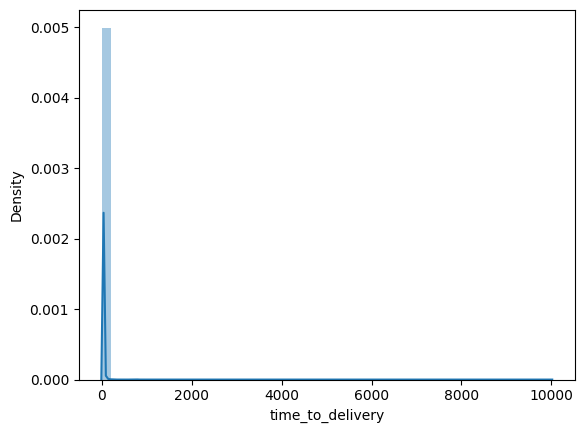

In [92]:
sns.distplot(t_df['time_to_delivery'])

In [36]:
t_df[['membership','delivery_speed']]

,membership,delivery_speed
0,Normal,140.294118
1,Prime,118.285714
2,Normal,270.000000
3,Prime,287.100000
4,Normal,124.448276
...,...,...
339595,Prime,350.000000
339596,Normal,205.000000
339597,Normal,65.250000
339598,Normal,40.680000


In [37]:
t_df['delivery_speed'].mean()

-inf

In [38]:
t_df[t_df['time_to_delivery']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 42 to 339039
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              402 non-null    int64  
 1   gender                402 non-null    object 
 2   order_time            402 non-null    object 
 3   allot_time            402 non-null    object 
 4   pickup_time           402 non-null    object 
 5   delivered_time        402 non-null    object 
 6   transport_id          402 non-null    int64  
 7   first_mile_distance   402 non-null    float64
 8   last_mile_distance    402 non-null    float64
 9   alloted_orders        402 non-null    float64
 10  delivered_orders      402 non-null    float64
 11  customer_care_calls   402 non-null    float64
 12  membership            402 non-null    object 
 13  product_importan      402 non-null    object 
 14  lifetime_order_count  402 non-null    float64
 15  undelivered_orders 

In [39]:
t_df['time_to_delivery'] = t_df['time_to_delivery']+0.5

In [40]:
t_df['delivery_speed'] = (t_df['last_mile_distance']*60)/t_df['time_to_delivery']

In [41]:
t_df[['membership','delivery_speed']].groupby('membership').mean()

,delivery_speed
membership,
Normal,178.918572
Prime,179.175116


In [42]:
t_df['time_to_pickup'] = t_df['time_to_pickup']+0.5

In [43]:
t_df['pickup_speed'] = (t_df['first_mile_distance']*60)/t_df['time_to_pickup']

In [44]:
t_df[['membership','pickup_speed']].groupby('membership').mean()

,pickup_speed
membership,
Normal,57.938836
Prime,57.902808


In [45]:
t_df.head()

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,...,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction,same_day_delivery,time_to_pickup,time_to_delivery,pickup_speed,delivery_speed
0,1003450,M,"(2021, 1, 26, 2, 21, 0, 1, 26, -1)","(2021, 1, 26, 2, 21, 0, 1, 26, -1)","(2021, 1, 26, 2, 32, 0, 1, 26, -1)","(2021, 1, 26, 2, 49, 0, 1, 26, -1)",11696,15.666,39.75,46.0,...,Normal,low,621.0,0.0,0,1,11.5,17.5,81.735652,136.285714
1,1003451,F,"(2021, 1, 26, 2, 33, 0, 1, 26, -1)","(2021, 1, 26, 2, 33, 0, 1, 26, -1)","(2021, 1, 26, 2, 50, 0, 1, 26, -1)","(2021, 1, 26, 3, 11, 0, 1, 26, -1)",18117,25.207,41.40,8.0,...,Prime,other,105.0,0.0,0,1,17.5,21.5,86.424000,115.534884
2,1003452,M,"(2021, 1, 26, 2, 39, 0, 1, 26, -1)","(2021, 1, 26, 2, 39, 0, 1, 26, -1)","(2021, 1, 26, 2, 56, 0, 1, 26, -1)","(2021, 1, 26, 3, 12, 0, 1, 26, -1)",18623,22.074,72.00,1.0,...,Normal,other,66.0,0.0,0,1,17.5,16.5,75.682286,261.818182
3,1003453,M,"(2021, 1, 26, 2, 47, 0, 1, 26, -1)","(2021, 1, 26, 2, 48, 0, 1, 26, -1)","(2021, 1, 26, 3, 21, 0, 1, 26, -1)","(2021, 1, 26, 3, 41, 0, 1, 26, -1)",15945,21.894,95.70,1.0,...,Prime,low,127.0,0.0,0,1,33.5,20.5,39.213134,280.097561
4,1003454,F,"(2021, 1, 26, 3, 6, 0, 1, 26, -1)","(2021, 1, 26, 3, 7, 0, 1, 26, -1)","(2021, 1, 26, 3, 31, 0, 1, 26, -1)","(2021, 1, 26, 4, 0, 0, 1, 26, -1)",17589,27.870,60.15,34.0,...,Normal,low,84.0,0.0,0,1,24.5,29.5,68.253061,122.338983


In [46]:
t_df['total_time'] = t_df.apply(lambda x : (time.mktime(x['order_time'])-time.mktime(x['delivered_time']))/-60,axis=1)
t_df['total_time']

0         28.0
1         38.0
2         33.0
3         54.0
4         54.0
          ... 
339595    31.0
339596    24.0
339597    45.0
339598    48.0
339599    30.0
Name: total_time, Length: 322950, dtype: float64

In [47]:
df['product_importan'].unique()

array(['low', 'other', 'high'], dtype=object)

In [48]:
f_df = t_df.drop(['order_time','allot_time','pickup_time','delivered_time'],axis=1)
f_df.head()

,order_id,gender,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction,same_day_delivery,time_to_pickup,time_to_delivery,pickup_speed,delivery_speed,total_time
0,1003450,M,11696,15.666,39.75,46.0,46.0,5.0,Normal,low,621.0,0.0,0,1,11.5,17.5,81.735652,136.285714,28.0
1,1003451,F,18117,25.207,41.40,8.0,8.0,4.0,Prime,other,105.0,0.0,0,1,17.5,21.5,86.424000,115.534884,38.0
2,1003452,M,18623,22.074,72.00,1.0,1.0,2.0,Normal,other,66.0,0.0,0,1,17.5,16.5,75.682286,261.818182,33.0
3,1003453,M,15945,21.894,95.70,1.0,1.0,5.0,Prime,low,127.0,0.0,0,1,33.5,20.5,39.213134,280.097561,54.0
4,1003454,F,17589,27.870,60.15,34.0,34.0,0.0,Normal,low,84.0,0.0,0,1,24.5,29.5,68.253061,122.338983,54.0


In [49]:
f_df['prime_member'] = f_df['membership'].apply(lambda x : 1 if x=='Prime' else 0)
f_df['prime_member']

0         0
1         1
2         0
3         1
4         0
         ..
339595    1
339596    0
339597    0
339598    0
339599    0
Name: prime_member, Length: 322950, dtype: int64

In [50]:
f_df['product_importance'] = f_df['product_importan'].apply(lambda x : 0 if x=='low' else (1 if x=='other' else 2))
f_df['product_importance']

0         0
1         1
2         1
3         0
4         0
         ..
339595    0
339596    0
339597    2
339598    0
339599    1
Name: product_importance, Length: 322950, dtype: int64

In [51]:
f_df['gender_F'] = f_df['gender'].apply(lambda x : 1 if x=='F' else 0)
f_df['gender_F']

0         0
1         1
2         0
3         0
4         1
         ..
339595    0
339596    0
339597    0
339598    0
339599    1
Name: gender_F, Length: 322950, dtype: int64

In [52]:
final_df = f_df.drop(['gender','membership','product_importan'],axis=1)
final_df.head()

,order_id,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,lifetime_order_count,undelivered_orders,dissatisfaction,same_day_delivery,time_to_pickup,time_to_delivery,pickup_speed,delivery_speed,total_time,prime_member,product_importance,gender_F
0,1003450,11696,15.666,39.75,46.0,46.0,5.0,621.0,0.0,0,1,11.5,17.5,81.735652,136.285714,28.0,0,0,0
1,1003451,18117,25.207,41.40,8.0,8.0,4.0,105.0,0.0,0,1,17.5,21.5,86.424000,115.534884,38.0,1,1,1
2,1003452,18623,22.074,72.00,1.0,1.0,2.0,66.0,0.0,0,1,17.5,16.5,75.682286,261.818182,33.0,0,1,0
3,1003453,15945,21.894,95.70,1.0,1.0,5.0,127.0,0.0,0,1,33.5,20.5,39.213134,280.097561,54.0,1,0,0
4,1003454,17589,27.870,60.15,34.0,34.0,0.0,84.0,0.0,0,1,24.5,29.5,68.253061,122.338983,54.0,0,0,1


In [53]:
final_df['transport_id'].nunique()

15809

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322950 entries, 0 to 339599
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              322950 non-null  int64  
 1   transport_id          322950 non-null  int64  
 2   first_mile_distance   322950 non-null  float64
 3   last_mile_distance    322950 non-null  float64
 4   alloted_orders        322950 non-null  float64
 5   delivered_orders      322950 non-null  float64
 6   customer_care_calls   322950 non-null  float64
 7   lifetime_order_count  322950 non-null  float64
 8   undelivered_orders    322950 non-null  float64
 9   dissatisfaction       322950 non-null  int64  
 10  same_day_delivery     322950 non-null  int64  
 11  time_to_pickup        322950 non-null  float64
 12  time_to_delivery      322950 non-null  float64
 13  pickup_speed          322950 non-null  float64
 14  delivery_speed        322950 non-null  float64
 15  

In [55]:
final_df.to_csv("cleaned_data.csv",index=False)

<AxesSubplot:>

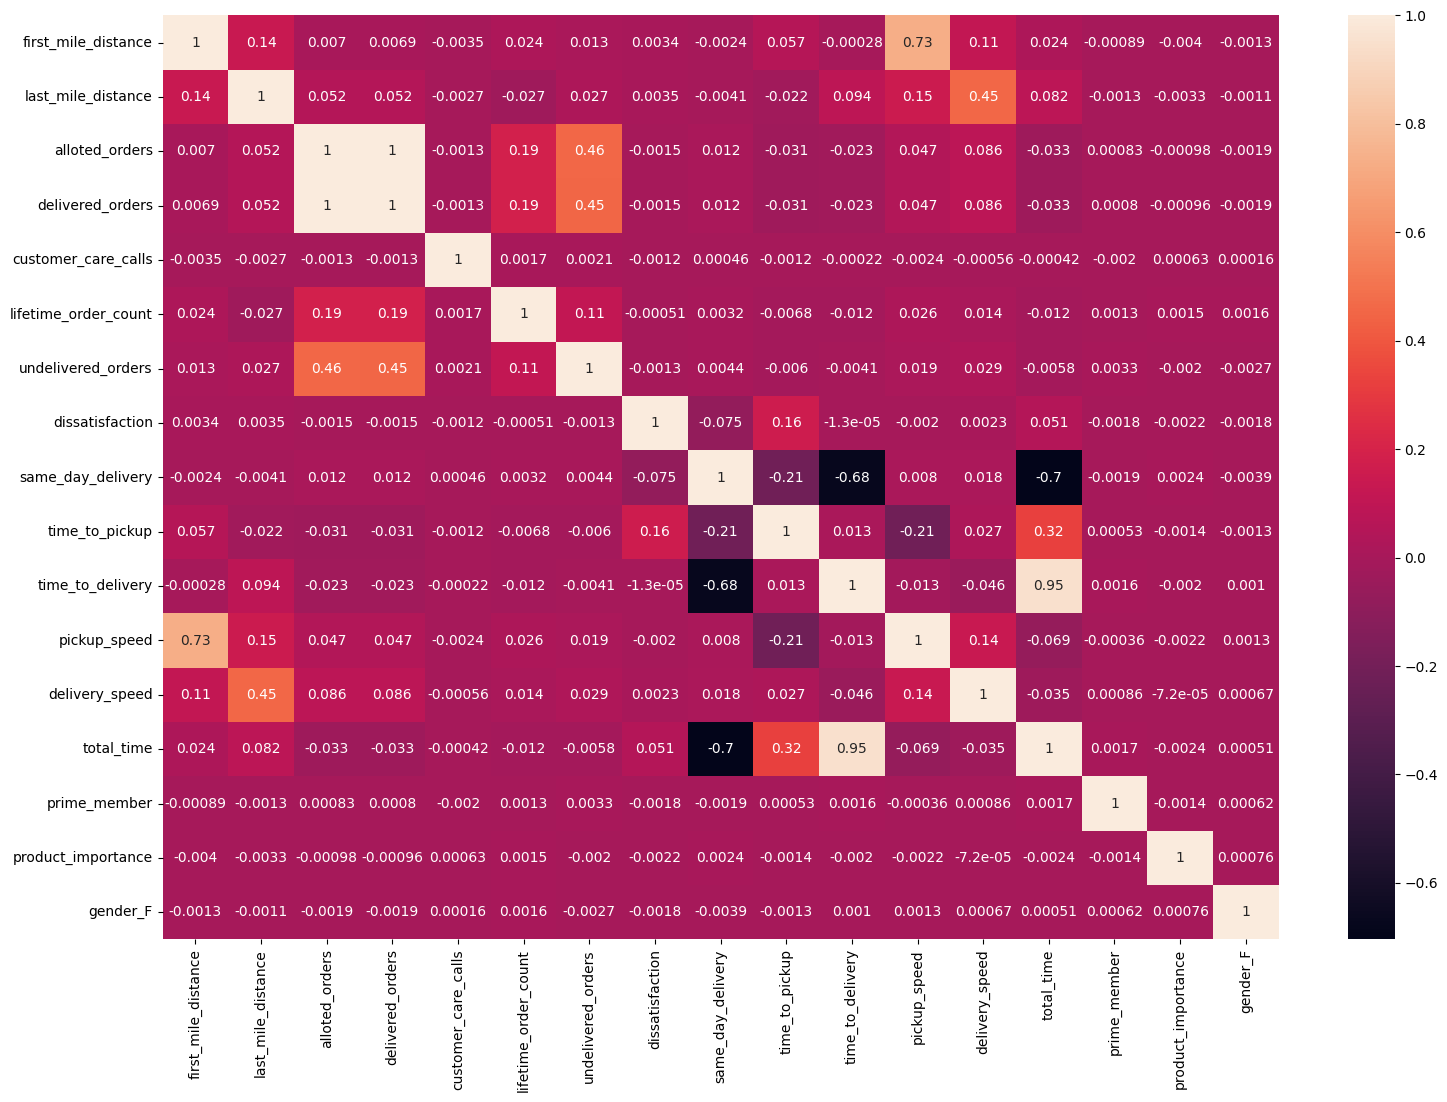

In [56]:
plt.figure(figsize=(18,12))
sns.heatmap(final_df.drop(['order_id','transport_id'],axis=1).corr(),annot=True)

In [57]:
sc_df = final_df.drop(['transport_id','order_id'],axis=1)
sc_df.head()

,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,lifetime_order_count,undelivered_orders,dissatisfaction,same_day_delivery,time_to_pickup,time_to_delivery,pickup_speed,delivery_speed,total_time,prime_member,product_importance,gender_F
0,15.666,39.75,46.0,46.0,5.0,621.0,0.0,0,1,11.5,17.5,81.735652,136.285714,28.0,0,0,0
1,25.207,41.40,8.0,8.0,4.0,105.0,0.0,0,1,17.5,21.5,86.424000,115.534884,38.0,1,1,1
2,22.074,72.00,1.0,1.0,2.0,66.0,0.0,0,1,17.5,16.5,75.682286,261.818182,33.0,0,1,0
3,21.894,95.70,1.0,1.0,5.0,127.0,0.0,0,1,33.5,20.5,39.213134,280.097561,54.0,1,0,0
4,27.870,60.15,34.0,34.0,0.0,84.0,0.0,0,1,24.5,29.5,68.253061,122.338983,54.0,0,0,1


In [58]:
big_cols = ['first_mile_distance','last_mile_distance','pickup_speed','delivery_speed']

for col in big_cols:
    sc_df[col] = np.log(1+sc_df[col])

In [59]:
sc_df.head()

,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,lifetime_order_count,undelivered_orders,dissatisfaction,same_day_delivery,time_to_pickup,time_to_delivery,pickup_speed,delivery_speed,total_time,prime_member,product_importance,gender_F
0,2.813371,3.707456,46.0,46.0,5.0,621.0,0.0,0,1,11.5,17.5,4.415651,4.922064,28.0,0,0,0
1,3.266027,3.747148,8.0,8.0,4.0,105.0,0.0,0,1,17.5,21.5,4.470770,4.758191,38.0,1,1,1
2,3.138706,4.290459,1.0,1.0,2.0,66.0,0.0,0,1,17.5,16.5,4.339671,5.571462,33.0,0,1,0
3,3.130875,4.571613,1.0,1.0,5.0,127.0,0.0,0,1,33.5,20.5,3.694194,5.638702,54.0,1,0,0
4,3.362803,4.113330,34.0,34.0,0.0,84.0,0.0,0,1,24.5,29.5,4.237767,4.814937,54.0,0,0,1


In [60]:
X = sc_df.drop('dissatisfaction',axis=1)
y = sc_df['dissatisfaction']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [62]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [63]:
train_y_preds = rf.predict(X_test)

In [64]:
print(classification_report(y_test,train_y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96885

    accuracy                           1.00     96885
   macro avg       1.00      1.00      1.00     96885
weighted avg       1.00      1.00      1.00     96885



In [65]:
test_df = pd.read_csv("test_data.csv")

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110400 entries, 0 to 110399
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              110400 non-null  int64  
 1   gender                110400 non-null  object 
 2   order_time            110400 non-null  object 
 3   allot_time            110400 non-null  object 
 4   pickup_time           109864 non-null  object 
 5   delivered_time        109187 non-null  object 
 6   transport_id          110400 non-null  int64  
 7   first_mile_distance   110400 non-null  float64
 8   last_mile_distance    110400 non-null  float64
 9   alloted_orders        106428 non-null  float64
 10  delivered_orders      106340 non-null  float64
 11  customer_care_calls   110400 non-null  int64  
 12  membership            110400 non-null  object 
 13  product_importan      110400 non-null  object 
 14  lifetime_order_count  110387 non-null  float64
 15  

In [66]:
test_df.isnull().sum()/1104

order_id                0.000000
gender                  0.000000
order_time              0.000000
allot_time              0.000000
pickup_time             0.485507
delivered_time          1.098732
transport_id            0.000000
first_mile_distance     0.000000
last_mile_distance      0.000000
alloted_orders          3.597826
delivered_orders        3.677536
customer_care_calls     0.000000
membership              0.000000
product_importan        0.000000
lifetime_order_count    0.011775
undelivered_orders      3.677536
dissatisfaction         0.000000
dtype: float64

In [67]:
f_test_df = test_df.dropna()

In [68]:
f_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105320 entries, 0 to 110399
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              105320 non-null  int64  
 1   gender                105320 non-null  object 
 2   order_time            105320 non-null  object 
 3   allot_time            105320 non-null  object 
 4   pickup_time           105320 non-null  object 
 5   delivered_time        105320 non-null  object 
 6   transport_id          105320 non-null  int64  
 7   first_mile_distance   105320 non-null  float64
 8   last_mile_distance    105320 non-null  float64
 9   alloted_orders        105320 non-null  float64
 10  delivered_orders      105320 non-null  float64
 11  customer_care_calls   105320 non-null  int64  
 12  membership            105320 non-null  object 
 13  product_importan      105320 non-null  object 
 14  lifetime_order_count  105320 non-null  float64
 15  

In [69]:
105320/1104

95.39855072463769

In [70]:
f_test_df['order_time'] = f_test_df['order_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))
f_test_df['allot_time'] = f_test_df['allot_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))
f_test_df['pickup_time'] = f_test_df['pickup_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))
f_test_df['delivered_time'] = f_test_df['delivered_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3994599688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test_df['order_time'] = f_test_df['order_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3994599688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test_df['allot_time'] = f_test_df['allot_time'].apply(lambda x : time.strptime(x,'%d-%m-%Y %H:%M'))
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipyke

In [71]:
f_test_df['time_to_pickup'] = f_test_df.apply(lambda x : (time.mktime(x['allot_time'])-time.mktime(x['pickup_time']))/-60,axis=1)
f_test_df['time_to_delivery'] = f_test_df.apply(lambda x : (time.mktime(x['pickup_time'])-time.mktime(x['delivered_time']))/-60,axis=1)

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/1955884338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test_df['time_to_pickup'] = f_test_df.apply(lambda x : (time.mktime(x['allot_time'])-time.mktime(x['pickup_time']))/-60,axis=1)
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/1955884338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test_df['time_to_delivery'] = f_test_df.apply(lambda x : (time.mktime(x['pickup_time'])-time.mktime(x['delivered_time']))/-60,

In [72]:
f_test_df['pickup_speed'] = (f_test_df['first_mile_distance']*60)/(0.5+f_test_df['time_to_pickup'])
f_test_df['delivery_speed'] = (f_test_df['last_mile_distance']*60)/(0.5+f_test_df['time_to_delivery'])

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/976770478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test_df['pickup_speed'] = (f_test_df['first_mile_distance']*60)/(0.5+f_test_df['time_to_pickup'])
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/976770478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test_df['delivery_speed'] = (f_test_df['last_mile_distance']*60)/(0.5+f_test_df['time_to_delivery'])


In [73]:
f_test_df['prime_member'] = f_test_df['membership'].apply(lambda x : 1 if x=='Prime' else 0)
f_test_df['product_importance'] = f_test_df['product_importan'].apply(lambda x : 0 if x=='low' else (1 if x=='other' else 2))
f_test_df['gender_F'] = f_test_df['gender'].apply(lambda x : 1 if x=='F' else 0)

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3783539736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test_df['prime_member'] = f_test_df['membership'].apply(lambda x : 1 if x=='Prime' else 0)
/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/3783539736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test_df['product_importance'] = f_test_df['product_importan'].apply(lambda x : 0 if x=='low' else (1 if x=='other' else 2))
/var/folders/s4/rbw51hr572v983ntn5czj87

In [74]:
f_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105320 entries, 0 to 110399
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              105320 non-null  int64  
 1   gender                105320 non-null  object 
 2   order_time            105320 non-null  object 
 3   allot_time            105320 non-null  object 
 4   pickup_time           105320 non-null  object 
 5   delivered_time        105320 non-null  object 
 6   transport_id          105320 non-null  int64  
 7   first_mile_distance   105320 non-null  float64
 8   last_mile_distance    105320 non-null  float64
 9   alloted_orders        105320 non-null  float64
 10  delivered_orders      105320 non-null  float64
 11  customer_care_calls   105320 non-null  int64  
 12  membership            105320 non-null  object 
 13  product_importan      105320 non-null  object 
 14  lifetime_order_count  105320 non-null  float64
 15  

In [75]:
f_test_df['total_time'] = f_test_df.apply(lambda x : (time.mktime(x['order_time'])-time.mktime(x['delivered_time']))/-60,axis=1)

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/4028422668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test_df['total_time'] = f_test_df.apply(lambda x : (time.mktime(x['order_time'])-time.mktime(x['delivered_time']))/-60,axis=1)


In [76]:
f_test_df['same_day_delivery'] = f_test_df.apply(lambda x : 1 if x['order_time'].tm_mday==x['delivered_time'].tm_mday else 0, axis=1)


/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_9285/4234098079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test_df['same_day_delivery'] = f_test_df.apply(lambda x : 1 if x['order_time'].tm_mday==x['delivered_time'].tm_mday else 0, axis=1)


In [77]:
final_test = f_test_df.drop(['order_id','gender','product_importan','membership','order_time','allot_time',
                             'pickup_time','delivered_time','transport_id'],axis=1)

In [78]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105320 entries, 0 to 110399
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   first_mile_distance   105320 non-null  float64
 1   last_mile_distance    105320 non-null  float64
 2   alloted_orders        105320 non-null  float64
 3   delivered_orders      105320 non-null  float64
 4   customer_care_calls   105320 non-null  int64  
 5   lifetime_order_count  105320 non-null  float64
 6   undelivered_orders    105320 non-null  float64
 7   dissatisfaction       105320 non-null  int64  
 8   time_to_pickup        105320 non-null  float64
 9   time_to_delivery      105320 non-null  float64
 10  pickup_speed          105320 non-null  float64
 11  delivery_speed        105320 non-null  float64
 12  prime_member          105320 non-null  int64  
 13  product_importance    105320 non-null  int64  
 14  gender_F              105320 non-null  int64  
 15  

In [79]:
final_test['dissatisfaction'].value_counts()

0    105320
Name: dissatisfaction, dtype: int64

In [80]:
test_y_test = final_test['dissatisfaction']

In [81]:
sc_final_test = final_test

In [82]:
for col in big_cols:
    sc_final_test[col] = np.log(1+sc_final_test[col])

In [83]:
sc_final_test.head()

,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,lifetime_order_count,undelivered_orders,dissatisfaction,time_to_pickup,time_to_delivery,pickup_speed,delivery_speed,prime_member,product_importance,gender_F,total_time,same_day_delivery
0,2.407756,3.754199,108.0,106.0,4,357.0,2.0,0,23.0,14.0,3.288783,5.156476,0,1,0,37.0,1
1,2.021150,4.318821,46.0,46.0,2,253.0,0.0,0,11.0,20.0,3.559860,5.383935,1,1,1,31.0,1
2,2.901037,3.200712,94.0,90.0,2,2229.0,4.0,0,19.0,12.0,3.987159,4.736549,1,1,1,31.0,1
3,3.326402,2.920470,24.0,24.0,3,161.0,0.0,0,19.0,8.0,4.425786,4.827372,1,0,1,27.0,1
4,2.639129,3.781914,24.0,24.0,1,65.0,0.0,0,15.0,13.0,3.938206,5.255758,0,0,1,28.0,1


In [84]:
y_preds = rf.predict(sc_final_test.drop('dissatisfaction',axis=1))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [85]:
print(classification_report(test_y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105320

    accuracy                           1.00    105320
   macro avg       1.00      1.00      1.00    105320
weighted avg       1.00      1.00      1.00    105320



In [86]:
rf.feature_importances_*100

array([ 8.5511236 ,  9.39237921,  5.78995141,  4.2723194 ,  3.00250181,
        3.85412199,  2.0967906 ,  0.90253079, 22.53239988,  4.96134211,
       13.41085964,  6.09007173,  9.73137278,  0.9677505 ,  3.47673406,
        0.9677505 ])

In [87]:
X.columns

Index(['first_mile_distance', 'last_mile_distance', 'alloted_orders',
       'delivered_orders', 'customer_care_calls', 'lifetime_order_count',
       'undelivered_orders', 'same_day_delivery', 'time_to_pickup',
       'time_to_delivery', 'pickup_speed', 'delivery_speed', 'total_time',
       'prime_member', 'product_importance', 'gender_F'],
      dtype='object')

In [88]:
feat_df = pd.DataFrame(data=[rf.feature_importances_*100],columns=X.columns)
feat_df

,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,lifetime_order_count,undelivered_orders,same_day_delivery,time_to_pickup,time_to_delivery,pickup_speed,delivery_speed,total_time,prime_member,product_importance,gender_F
0,8.551124,9.392379,5.789951,4.272319,3.002502,3.854122,2.096791,0.902531,22.5324,4.961342,13.41086,6.090072,9.731373,0.96775,3.476734,0.96775


In [89]:
submission_01 = test_df[['order_id','dissatisfaction']]

In [90]:
submission_01.to_csv("submission_01.csv",index=False)